In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем датасет.

In [3]:
df = pd.read_csv('/content/ebw_data.csv')
df

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


Целевая переменная состоит из двух признаков - шириной и глубиной шва (Width, Depth). Один показатель оставить нельзя, так как нет линейной зависимлости между ними.

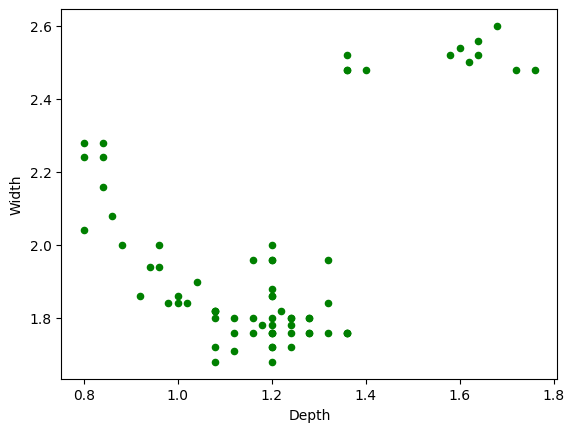

In [ ]:
ax1 = df.plot(kind='scatter', x='Depth', y='Width', color='g')

Значения пераметров не распредляются непрерывно. Распределение не является нормальным.

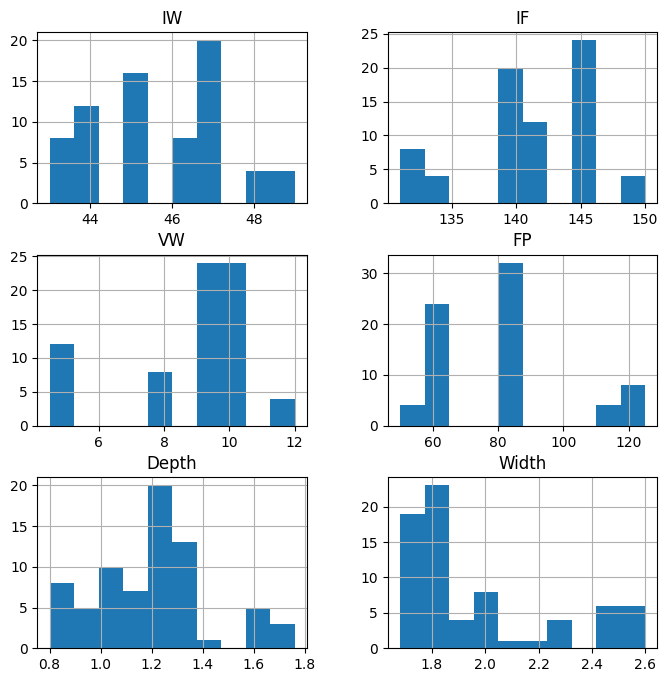

In [ ]:
df.hist(figsize = (8, 8))
plt.show()

В татасете 72 значения, пропусков нет, тип значений: int - цельночисленное и float - число с плавающей точкой.  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


С помощью функции scatter matrix построим сетку точечных графиков, которая показывает взаимосвязь между парами переменных. Линейной зависимости нет, поэтому для анализа нужно использовать все переменные, нельзя выделить какую-либо одну, наиболее значимую.

array([[<Axes: xlabel='IW', ylabel='IW'>,
        <Axes: xlabel='IF', ylabel='IW'>,
        <Axes: xlabel='VW', ylabel='IW'>,
        <Axes: xlabel='FP', ylabel='IW'>,
        <Axes: xlabel='Depth', ylabel='IW'>,
        <Axes: xlabel='Width', ylabel='IW'>],
       [<Axes: xlabel='IW', ylabel='IF'>,
        <Axes: xlabel='IF', ylabel='IF'>,
        <Axes: xlabel='VW', ylabel='IF'>,
        <Axes: xlabel='FP', ylabel='IF'>,
        <Axes: xlabel='Depth', ylabel='IF'>,
        <Axes: xlabel='Width', ylabel='IF'>],
       [<Axes: xlabel='IW', ylabel='VW'>,
        <Axes: xlabel='IF', ylabel='VW'>,
        <Axes: xlabel='VW', ylabel='VW'>,
        <Axes: xlabel='FP', ylabel='VW'>,
        <Axes: xlabel='Depth', ylabel='VW'>,
        <Axes: xlabel='Width', ylabel='VW'>],
       [<Axes: xlabel='IW', ylabel='FP'>,
        <Axes: xlabel='IF', ylabel='FP'>,
        <Axes: xlabel='VW', ylabel='FP'>,
        <Axes: xlabel='FP', ylabel='FP'>,
        <Axes: xlabel='Depth', ylabel='FP'>,
        <A

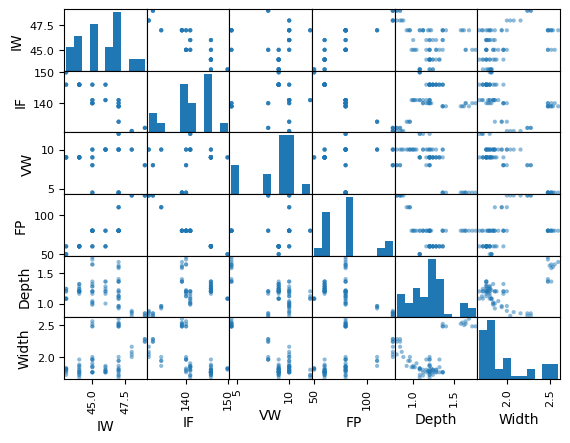

In [ ]:
pd.plotting.scatter_matrix(df)

<ipython-input-24-6fd29e726f4e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i+1)
<ipython-input-24-6fd29e726f4e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i+1)
<ipython-input-24-6fd29e726f4e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i+1)
<ipython-input-24-6fd29e726f4e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i+1)
<ipython-input-24-6fd29e726f4e>:4: MatplotlibDeprecationWarning: Auto-re

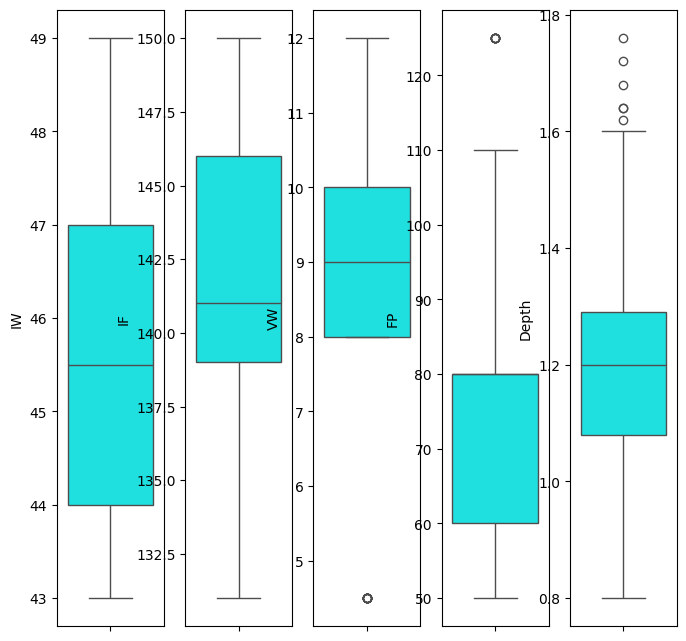

In [ ]:
plt.subplots(nrows=5 , ncols=5 , figsize=(8,8))
for i in range (len(df.columns)-1):

    plt.subplot(1, 5, i+1)
    sns.boxplot(df[df.columns[i]], color='aqua')

Визуализация с использованием "ящика с усами" паказывает, что есть выбросы (т.е. значения, которые больше/меньше среднего значения +- полтора стандартных отклонения). Выбросы имеют показатели Depth - глубина шва, FP - расстояние от образца до электронно-оптической системы, VW - скорость сварки.

In [ ]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


Функция nunique - определяет количество уникальных значений

In [ ]:
df.nunique()

,0
IW,7
IF,8
VW,5
FP,5
Depth,29
Width,25


Метод value_counts () позволяет определить, как часто каждое уникальное значение встречается в столбце.

In [ ]:
df['FP'].value_counts()

,count
FP,
80,32
60,24
125,8
110,4
50,4


"Ящик с усами" показывает, что значение выше 120 признака FP (расстоянием от образца до электронно-оптической системы) является выбросами. Таких значений 8.

In [ ]:
df1 = df[df['FP'] > 120]
df1

,IW,IF,VW,FP,Depth,Width
32,48,131,10.0,125,0.84,2.16
33,48,131,10.0,125,0.86,2.08
34,48,131,10.0,125,0.88,2.00
35,48,131,10.0,125,0.80,2.04
36,49,132,8.0,125,0.84,2.28
37,49,132,8.0,125,0.84,2.24
38,49,132,8.0,125,0.80,2.24
39,49,132,8.0,125,0.80,2.28


Выбросов (т.е. значений более 1.6) в целевой переменной (глубина шва) - 7.

In [ ]:
df2 = df[df['Depth'] > 1.6]
df2

,IW,IF,VW,FP,Depth,Width
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
4,45,140,4.5,80,1.76,2.48
5,45,140,4.5,80,1.72,2.48
6,45,140,4.5,80,1.64,2.52
7,45,140,4.5,80,1.64,2.56


<Axes: ylabel='Width'>

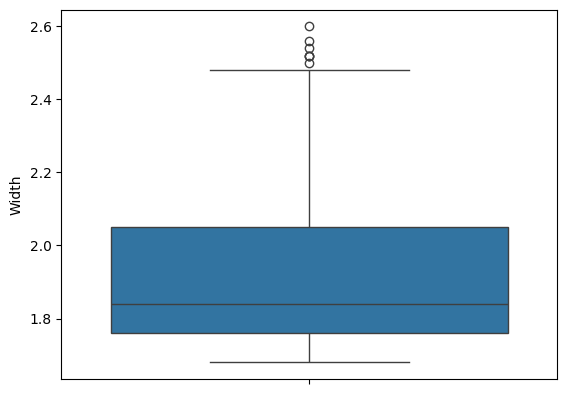

In [ ]:
sns.boxplot(df['Width'])

In [ ]:
df3 = df[df['Width'] > 2.5]
df3

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
6,45,140,4.5,80,1.64,2.52
7,45,140,4.5,80,1.64,2.56
28,47,139,4.5,80,1.36,2.52


Если исключить выбросы, то останется 60 строк. Так как датасет небльшой - всего 72 показателя (строки) - будем работать со всем датасетом.

In [ ]:
q_low = df['FP'].quantile(0.25)
q_hi = df['FP'].quantile(0.75)
q_range = q_hi - q_low
df5 = df[(df['FP'] < q_hi + 1.5 * q_range) & (df['FP'] > q_low - 1.5 * q_range)]
df5.shape

(60, 6)

In [ ]:
q_low = df['Width'].quantile(0.25)
q_hi = df['Width'].quantile(0.75)
q_range = q_hi - q_low
df4 = df[(df['Width'] < q_hi + 1.5 * q_range) & (df['Width'] > q_low - 1.5 * q_range)]
df4.shape

(65, 6)

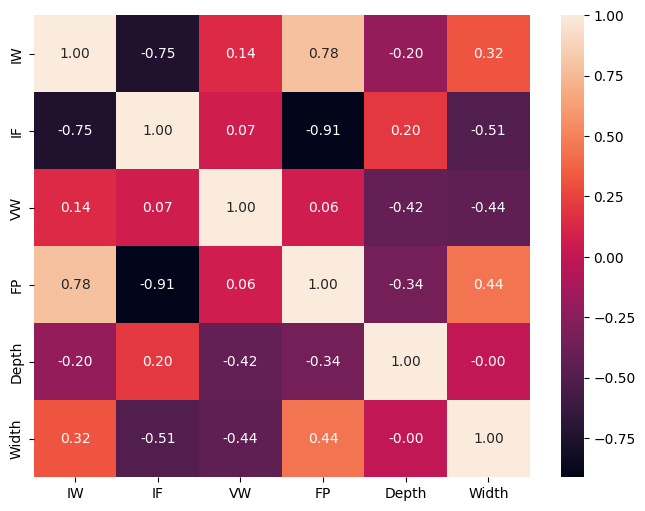

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='kendall'), annot=True, fmt='.2f')
plt.show()

Функция corr рассчитывает корреляцию меджу переменными, она определяется в диапазоне от 1 до -1 и показывает насколько они взаимозависимы. Отрицательная корреляция показывает обратную зависимость - насколько один параметр уменьшается приувеличении другого (чем блице к -1, тем отрицательная корреляция сильнее выражена). Положительная корреляция показавает прямую зависимость. В нашем датасете при увеличении тока сварки (IW) - ток фокусировки электронного пучка (IF) уменьшается. Расстояние от образца до электронно-оптической системы (FP) - увеличивается.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error,
                             mean_squared_error, r2_score)

Определяем целевые переменные - ширина и глубина сварочного шва.

In [5]:
y = df[['Width', 'Depth']]
X = df.drop(['Width', 'Depth'], axis=1)

In [ ]:
y

,Width,Depth
0,2.54,1.60
1,2.50,1.62
2,2.60,1.68
3,2.52,1.58
4,2.48,1.76
...,...,...
67,1.72,1.20
68,1.76,1.36
69,1.76,1.28
70,1.76,1.28


In [ ]:
X

,IW,IF,VW,FP
0,47,139,4.5,80
1,47,139,4.5,80
2,47,139,4.5,80
3,47,139,4.5,80
4,45,140,4.5,80
...,...,...,...,...
67,44,146,9.0,60
68,45,146,9.0,60
69,45,146,9.0,60
70,45,146,9.0,60


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 17)

Делим датасет на обучающую выборку и тестовую, что позволяет обучить модель на одной части данных (80%) и проверить её производительность на другой (20%).

Так как исходные значения признаков изменяются в небольшом дапазоне (не отличаются друг от друга на несколько порядков) нормализацию не провожу.

In [7]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared=False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(test_data_rmse)
print(training_data_rmse)

0.08165194681457041
0.08319807655713735


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Для обучения модели использую алгоритм машинного обучения - линейную регрессию. Гиперплоскость должна проходить через данные таким образом, чтобы в среднем разница квадратов ожидаемых и реальных значений была минимальна.

Значение RMSE (квадратный корень из среднеквадратичной ошибки) оценивается как средняя ожидаемая разница между прогнозным значением и фактическим значением. R2 — коэффициент детерминации (доля дисперсии зависимой переменной). Чем ближе к 1, тем модель лучше отработала.

In [29]:
def manual_r2_score(y_true, y_pred):
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)

    return 1 - ssr / sst


r2 = manual_r2_score(y_test, y_pred)
sk_r2 = r2_score(y_test, y_pred)
print(f'r2: {r2}')
print(f'r2(scikit-learn): {sk_r2}')

r2: Width    0.883451
Depth    0.578453
dtype: float64
r2(scikit-learn): 0.7309520230279158


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


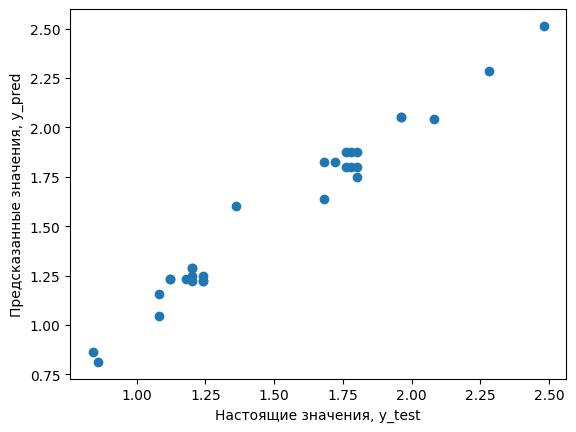

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения, y_test")
plt.ylabel("Предсказанные значения, y_pred")
plt.show()

In [31]:
from sklearn import preprocessing

In [32]:
df_min_max_scaled = df.copy()

Для сранения результатов произведем нормализацию данных (т.е. приведем их к диапазону от 0 до 1) используя код MinMaxScaler, импортируя его из библиотеки машинного обучения sklearn. X_нормализованное = (X - X_min)/(X_max-X_min).

In [33]:
min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()

scaled_x = min_max_scaler_x.fit_transform(df_min_max_scaled)
scaled_y = min_max_scaler_y.fit_transform(df_min_max_scaled)

In [35]:
scaled_x[0:5]

array([[0.66666667, 0.42105263, 0.        , 0.4       , 0.83333333,
        0.93478261],
       [0.66666667, 0.42105263, 0.        , 0.4       , 0.85416667,
        0.89130435],
       [0.66666667, 0.42105263, 0.        , 0.4       , 0.91666667,
        1.        ],
       [0.66666667, 0.42105263, 0.        , 0.4       , 0.8125    ,
        0.91304348],
       [0.33333333, 0.47368421, 0.        , 0.4       , 1.        ,
        0.86956522]])

In [36]:
scaled_x_train, scaled_x_test, scaled_y_train, scaled_y_test = train_test_split(scaled_x, scaled_y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 17)

In [37]:
model = LinearRegression()

model.fit(scaled_x_train, scaled_y_train)
scaled_y_pred = model.predict(scaled_x_test)
scaled_y_train_pred = model.predict(scaled_x_train)
test_data_rmse = mean_squared_error(scaled_y_test, scaled_y_pred, squared=False)
training_data_rmse = mean_squared_error(scaled_y_train, scaled_y_train_pred, squared=False)
print(test_data_rmse)
print(training_data_rmse)

1.8197740668172319e-16
1.6677099513194738e-16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
def manual_r2_score(scaled_y_true, scaled_y_pred):
    ssr = np.sum((scaled_y_true - scaled_y_pred) ** 2)
    sst = np.sum((scaled_y_true - scaled_y_true.mean()) ** 2)

    return 1 - ssr / sst


r2 = manual_r2_score(scaled_y_test, scaled_y_pred)
sk_r2 = r2_score(scaled_y_test, scaled_y_pred)
print(f'r2: {r2}')
print(f'r2(scikit-learn): {sk_r2}')

r2: 1.0
r2(scikit-learn): 1.0


абота модели с нормализованными данными показала лучший результат. Ошибка rmse - сремится к 0. Коэффициент детерминации равен 1.

In [39]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

Второй метод обучения модели - дерево решений

In [40]:
y = df[['Width', 'Depth']]
X = df.drop(['Width', 'Depth'], axis=1)

In [41]:
y1 = np.array(y)
y1

array([[2.54, 1.6 ],
       [2.5 , 1.62],
       [2.6 , 1.68],
       [2.52, 1.58],
       [2.48, 1.76],
       [2.48, 1.72],
       [2.52, 1.64],
       [2.56, 1.64],
       [2.  , 1.2 ],
       [1.96, 1.2 ],
       [1.96, 1.16],
       [1.96, 1.2 ],
       [1.84, 0.98],
       [1.84, 1.02],
       [1.9 , 1.04],
       [1.86, 1.  ],
       [1.78, 1.2 ],
       [1.84, 1.  ],
       [1.86, 1.2 ],
       [1.8 , 1.16],
       [1.71, 1.12],
       [1.68, 1.08],
       [1.8 , 1.2 ],
       [1.72, 1.08],
       [2.  , 0.96],
       [1.94, 0.96],
       [1.86, 0.92],
       [1.94, 0.94],
       [2.52, 1.36],
       [2.48, 1.36],
       [2.48, 1.4 ],
       [2.48, 1.36],
       [2.16, 0.84],
       [2.08, 0.86],
       [2.  , 0.88],
       [2.04, 0.8 ],
       [2.28, 0.84],
       [2.24, 0.84],
       [2.24, 0.8 ],
       [2.28, 0.8 ],
       [1.76, 1.12],
       [1.82, 1.22],
       [1.8 , 1.12],
       [1.78, 1.18],
       [1.8 , 1.28],
       [1.76, 1.36],
       [1.76, 1.36],
       [1.76,

In [42]:
X1 = np.array(X)
X1

array([[ 47. , 139. ,   4.5,  80. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 45. , 140. ,   8. ,  80. ],
       [ 45. , 140. ,   8. ,  80. ],
       [ 45. , 140. ,   8. ,  80. ],
       [ 45. , 140. ,   8. ,  80. ],
       [ 45. , 141. ,  10. ,  80. ],
       [ 45. , 141. ,  10. ,  80. ],
       [ 45. , 141. ,  10. ,  80. ],
       [ 45. , 141. ,  10. ,  80. ],
       [ 46. , 141. ,  10. ,  80. ],
       [ 46. , 141. ,  10. ,  80. ],
       [ 46. , 141. ,  10. ,  80. ],
       [ 46. , 141. ,  10. ,  80. ],
       [ 47. , 141. ,  12. ,  80. ],
       [ 47. , 141. ,  12. ,  80. ],
       [ 47. , 141. ,  12. ,  80. ],
       [ 47. , 141. ,  12. ,  80. ],
       [ 47. , 134. ,  10. , 110. ],
       [ 47. , 134. ,  10. , 110. ],
       [ 47. , 134. ,  10. , 110. ],
 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 17)

In [44]:
np.random.seed(17)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2, 3],
              'criterion' :['gini', 'entropy']
              }

dec_tree = DecisionTreeRegressor()


Определяем параметры:
1) max_features - число признаков для разделения: целое число, число с плавающей точкой или {«sqrt», «log2»}, по умолчанию равно None.
Количество функций, которые следует учитывать при поиске наилучшего разделения. Для построения каждого разделения в дереве просматриваем max_features случайных признаков (для каждого нового — свои случайные признаки).
Выбираем наилучшие признак и разделяем по нему.
2) ccp_alpha - параметр сложности, используемый для минимальной обрезки по сложности затрат. Будет выбрано поддерево с наибольшей сложностью затрат, которая меньше, чем ccp_alpha, это алгоритм, используемый для обрезки дерева, чтобы избежать переобучения.
3) max_depth - максимальная глубина дерева. 4) criterion - критерии: измерение качества разделения (Джини, энтропия). Энтропия – мера беспорядка (чем более однородно множество — тем меньше энтропия).

In [45]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
y_dec_tree = dec_tree.predict(X_test)

In [ ]:
print("Среднеквадратичная ошибка:", mean_squared_error(y_test, y_dec_tree))
print("Средняя абсолютная ошибка:", mean_absolute_error(y_test, y_dec_tree))
print("Коэффициент детерминации:", r2_score(y_test, y_dec_tree))

Среднеквадратичная ошибка: 0.0035379879062736215
Средняя абсолютная ошибка: 0.04618730158730159
Коэффициент детерминации: 0.8647075961804944


Ошибка mse = 0,0035. Коэффициент детерминации R2 равен 0.86. Модель отработала хорошо.

In [49]:
np.set_printoptions(precision=3, suppress=True)

import warnings
warnings.filterwarnings("ignore")

Для построения модели - многослойный перцептрон импортируем библиотеки, обеспечивающие взаимодействие с искусственными нейронными сетями - TensorFlow, Keras.

In [50]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [52]:
df_lm = df.copy()

In [53]:
y = df_lm[['Width', 'Depth']].values
X = df_lm.drop(['Width', 'Depth'], axis=1).values

Создаем последовательную модель - многослойный перцептрон, скрытых слоев нет. Два слоя:
1. нормализатор
2. полносвязный

In [54]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

In [55]:
linear_model = tf.keras.Sequential()
linear_model.add(normalizer)
linear_model.add(layers.Dense(units=1))

In [56]:
linear_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1) ,
    loss='mean_absolute_error')

Оптимизатор: стохастический градиентный спуск (SGD, Stochastic Gradient Descent).
Скорость обучения - learning_rate=0.1.
Функция потерь - mean_absolute_error (среднее абсолютное отклонение)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 17)

In [58]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=50, # количество эпох
    verbose=1, #как часто мы показываем информацию
    validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 2.3137 - val_loss: 1.6781
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.9200 - val_loss: 1.5026
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.6433 - val_loss: 1.3654
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.4523 - val_loss: 1.2399
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2379 - val_loss: 1.1030
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.0643 - val_loss: 0.9815
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9118 - val_loss: 0.8829
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.7790 - val_loss: 0.7943
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7278 - val_loss: 0.7324
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6799 - val_loss: 0.6731
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5965 - val_loss: 0.5947
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5839 - val_loss: 0.5536


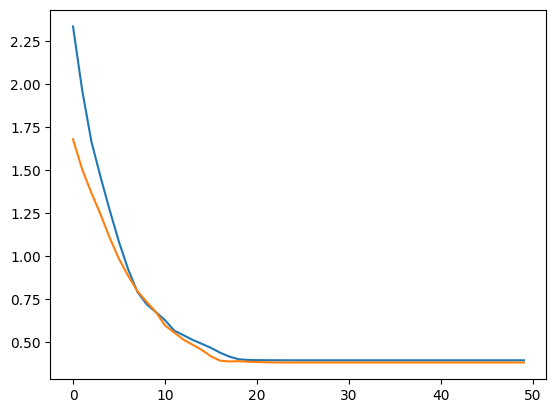

In [59]:
hist = pd.DataFrame(history.history)
plt.plot(hist)
plt.show()

Синяя линия - ошибка обучения, оранжевая - ошибка валидации

MPG Mean absolute error

In [68]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(X_test, y_test, verbose=0)

In [69]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,0.382273


Функция model.evaluate() состоит в том, чтобы оценить эффективность обученной модели на заданном наборе данных. Средняя абсолютная ошибка = 0,382243

После 21 эпохи - ошибка обучения не снижается.

**Вывод:** лучший результат показала модель "Линейная регрессия" с нормализованными данными.